<H1>In this notebook we will try to find relation among differen attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sbn
sbn.set(style ='white')
import matplotlib.ticker as mticker
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import csv
import os




it's time to load the data set.

In [2]:
data = pd.read_csv(r'C:/Users/muzamil.hussain/churn prediction using XGBOOST and DNN/data_set_telecom.csv')
print(data.shape)
data.head(5)

(45131, 23)


,S.No,Account ID,Avg_bill_payment,Cust_age,product_count,exchange,Curr_Data_rate,Conn_catg,cust_catg,no_SRs_in_3Yrs,...,Data_services,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,Avg_calls_in_3Yrs,avg_usage_2018,avg_usage_2019,avg_usage_2020,Avg_usage_in_3Yrs,churn
0,20512,1.000000e+11,2429,4.7,2,04KHTDAK,6 Mbps,Residential,Gold,2,...,partial,2,0,0,1,125,179,4321,1542,NO
1,32801,2.107212e+09,4390,4.1,2,04BNUMSH,6 Mbps,Forces,Gold,1,...,No,9381,0,0,3127,49,0,0,16,YES
2,32853,2.106854e+09,2623,4.9,2,04BNUMSH,4 Mbps,Forces,Gold,7,...,No,1236,5,0,414,61,0,0,20,YES
3,43286,2.106700e+09,1627,6.0,2,04BNUMSH,8 Mbps,Forces,Gold,2,...,No,963,305,1,423,65,208,802,358,YES
4,43364,2.106447e+09,3426,4.0,2,04BNUMSH,8 Mbps,Forces,Gold,1,...,No,4486,553,0,1680,0,109,0,36,YES


## correlation

In [3]:
data.columns.values
data.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['S.No', 'Account ID', 'Avg_bill_payment', 'Cust_age', 'product_count',
       'exchange', 'Curr_Data_rate', 'Conn_catg', 'cust_catg',
       'no_SRs_in_3Yrs', 'rep_SRs_in_3Yrs', 'MTTR', 'Denial in_3Yrs',
       'Data_services', 'Avg_calls_2018', 'Avg_calls_2019', 'Avg_calls_2020',
       'Avg_calls_in_3Yrs', 'avg_usage_2018', 'avg_usage_2019',
       'avg_usage_2020', 'Avg_usage_in_3Yrs', 'churn'],
      dtype='object')>

In [4]:
data.dtypes

S.No                   int64
Account ID           float64
Avg_bill_payment       int64
Cust_age             float64
product_count          int64
exchange              object
Curr_Data_rate        object
Conn_catg             object
cust_catg             object
no_SRs_in_3Yrs         int64
rep_SRs_in_3Yrs        int64
MTTR                   int64
Denial in_3Yrs         int64
Data_services         object
Avg_calls_2018         int64
Avg_calls_2019         int64
Avg_calls_2020         int64
Avg_calls_in_3Yrs      int64
avg_usage_2018         int64
avg_usage_2019         int64
avg_usage_2020         int64
Avg_usage_in_3Yrs      int64
churn                 object
dtype: object

remove ID value and Yes and NO with Binary values

In [5]:
data_set_2 =data.iloc[:,2:]
data_set_2.head(2)
data_set_2['churn'].replace(to_replace='YES', value=1, inplace=True)
data_set_2['churn'].replace(to_replace='NO',  value=0, inplace=True)
data_ana = pd.get_dummies(data_set_2)
data_ana.head(2)

,Avg_bill_payment,Cust_age,product_count,no_SRs_in_3Yrs,rep_SRs_in_3Yrs,MTTR,Denial in_3Yrs,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,...,Conn_catg_PTCL_inter0l,Conn_catg_Residential,Conn_catg_corp,Conn_catg_forces,cust_catg_Gold,cust_catg_Platinum,cust_catg_silver,Data_services_No,Data_services_Yes,Data_services_partial
0,2429,4.7,2,2,0,0,1,2,0,0,...,0,1,0,0,1,0,0,0,0,1
1,4390,4.1,2,1,0,0,2,9381,0,0,...,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

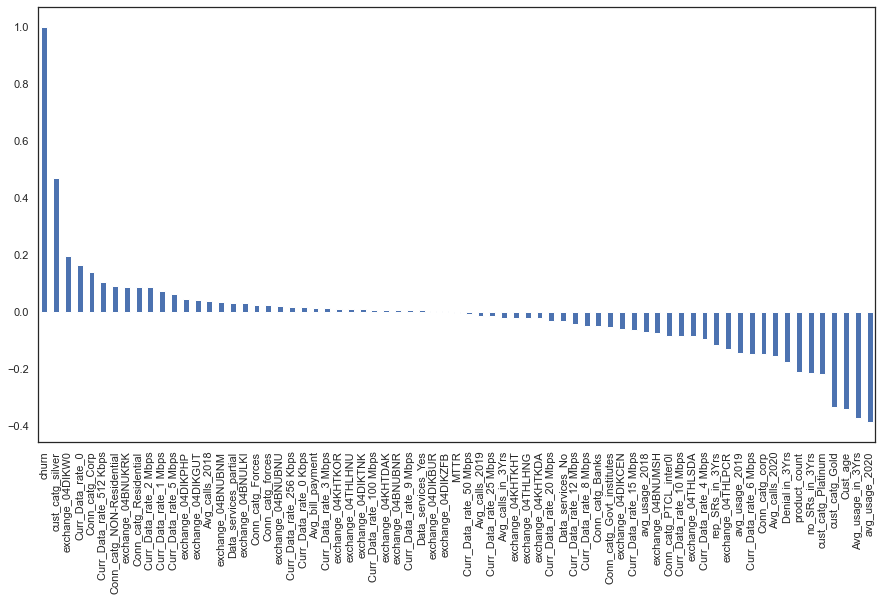

In [6]:
pyplot.figure(figsize=(15,8))
data_ana.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


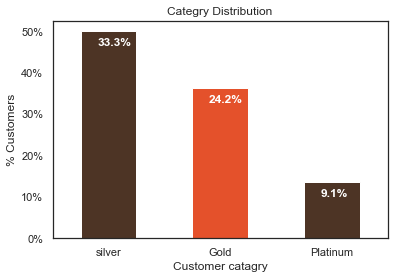

In [6]:
colors = ['#4D3425','#E4512B']
ax = (data['cust_catg'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Customer catagry')
ax.set_ylabel('% Customers')
ax.set_title('Categry Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


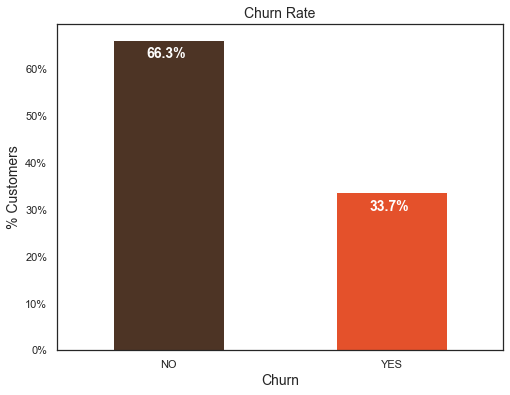

In [8]:
colors = ['#4D3425','#E4512B']
ax = (data['churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

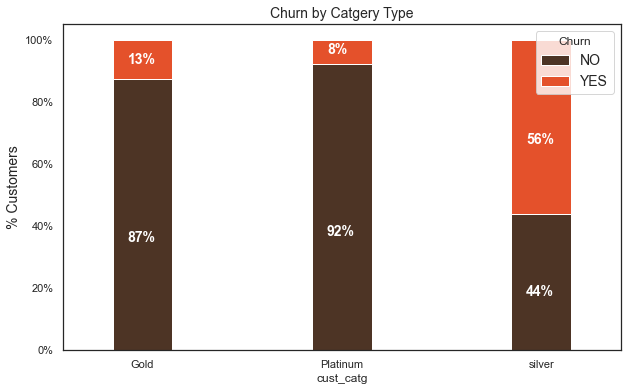

In [7]:
colors = ['#4D3425','#E4512B']
catg_churn = data.groupby(['cust_catg','churn']).size().unstack()

ax = (catg_churn.T*100.0 / catg_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Catgery Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'Distribution of customer age with PTCL by churn')

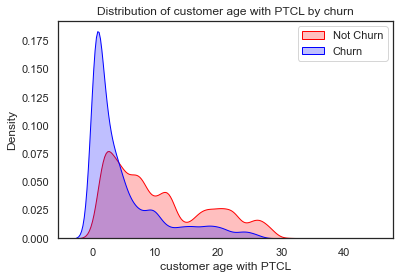

In [8]:
ax = sbn.kdeplot(data.Cust_age[(data["churn"] == 'NO') ],
                color="Red", shade = True)
ax = sbn.kdeplot(data.Cust_age[(data["churn"] == 'YES') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('customer age with PTCL')
ax.set_title('Distribution of customer age with PTCL by churn')

Text(0.5, 1.0, 'Distribution products count by churn')

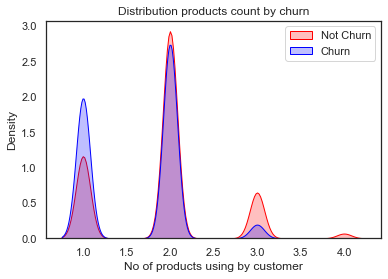

In [9]:
ax = sbn.kdeplot(data.product_count[(data["churn"] == 'NO') ],
                color="Red", shade = True)
ax = sbn.kdeplot(data.product_count[(data["churn"] == 'YES') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of products using by customer')
ax.set_title('Distribution products count by churn')

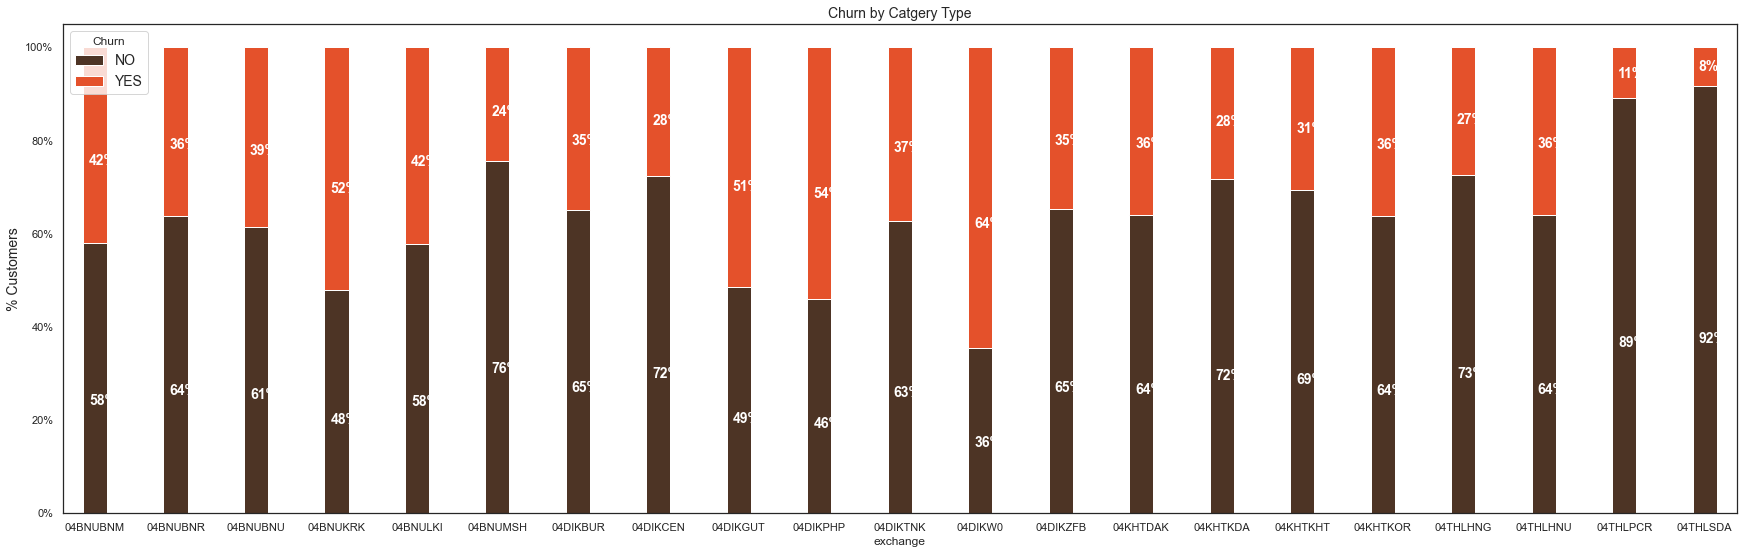

In [12]:
colors = ['#4D3425','#E4512B']
catg_churn = data.groupby(['exchange','churn']).size().unstack()

ax = (catg_churn.T*100.0 / catg_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (30,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Catgery Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [10]:
colors = ['#4D3425','#E4512B']
catg_churn = data.groupby(['data_ser','churn']).size().unstack()

ax = (catg_churn.T*100.0 / catg_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (30,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Catgery Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

KeyError: 'data_ser'

In [11]:
data.corr()

,S.No,Account ID,Avg_bill_payment,Cust_age,product_count,no_SRs_in_3Yrs,rep_SRs_in_3Yrs,MTTR,Denial in_3Yrs,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,Avg_calls_in_3Yrs,avg_usage_2018,avg_usage_2019,avg_usage_2020,Avg_usage_in_3Yrs
S.No,1.000000,0.378414,0.044678,-0.610809,-0.179459,-0.223941,-0.132202,-0.023393,-0.208367,0.030035,-0.016851,-0.140415,-0.022332,-0.117514,-0.125765,-0.272294,-0.265551
Account ID,0.378414,1.000000,0.098211,-0.669819,0.193458,-0.094518,-0.063474,-0.052909,-0.113691,-0.089316,-0.081424,-0.065329,-0.092619,0.003758,0.093411,0.065311,0.066422
Avg_bill_payment,0.044678,0.098211,1.000000,-0.112615,0.200879,0.080140,0.048300,0.020909,0.058169,0.351910,0.390284,0.255263,0.390559,0.220433,0.238320,0.187213,0.198484
Cust_age,-0.610809,-0.669819,-0.112615,1.000000,-0.097968,0.150603,0.091956,0.044904,0.164413,0.029214,0.045249,0.083303,0.051353,0.018494,-0.030896,0.029340,0.026160
product_count,-0.179459,0.193458,0.200879,-0.097968,1.000000,0.286608,0.187841,0.009374,0.255900,-0.180296,-0.191533,-0.114189,-0.193172,0.342864,0.390365,0.416076,0.425641
no_SRs_in_3Yrs,-0.223941,-0.094518,0.080140,0.150603,0.286608,1.000000,0.897556,0.109673,0.935634,-0.026483,-0.017842,0.017705,-0.016681,0.277306,0.273422,0.289379,0.297984
rep_SRs_in_3Yrs,-0.132202,-0.063474,0.048300,0.091956,0.187841,0.897556,1.000000,0.076671,0.877110,-0.022816,-0.017522,0.002198,-0.018139,0.216204,0.199557,0.192905,0.201183
MTTR,-0.023393,-0.052909,0.020909,0.044904,0.009374,0.109673,0.076671,1.000000,0.127259,0.012700,0.009709,0.013910,0.013513,0.044119,0.029529,0.015164,0.017944
Denial in_3Yrs,-0.208367,-0.113691,0.058169,0.164413,0.255900,0.935634,0.877110,0.127259,1.000000,-0.038485,-0.031104,0.001113,-0.031771,0.262550,0.240079,0.236495,0.246243
Avg_calls_2018,0.030035,-0.089316,0.351910,0.029214,-0.180296,-0.026483,-0.022816,0.012700,-0.038485,1.000000,0.826197,0.396614,0.928816,-0.010464,-0.028118,-0.046349,-0.045163


In [12]:
num_df = data[["Cust_age","product_count","NO_SRs_in_3Yrs","rep_SRs_in_3Yrs","MTTR","Denial in_3Yrs"]]
sbn.pairplot(num_df,kind="scatter")
pyplot.show()

KeyError: "['NO_SRs_in_3Yrs'] not in index"

In [13]:
data.head(2)

,S.No,Account ID,Avg_bill_payment,Cust_age,product_count,exchange,Curr_Data_rate,Conn_catg,cust_catg,no_SRs_in_3Yrs,...,Data_services,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,Avg_calls_in_3Yrs,avg_usage_2018,avg_usage_2019,avg_usage_2020,Avg_usage_in_3Yrs,churn
0,20512,1.000000e+11,2429,4.7,2,04KHTDAK,6 Mbps,Residential,Gold,2,...,partial,2,0,0,1,125,179,4321,1542,NO
1,32801,2.107212e+09,4390,4.1,2,04BNUMSH,6 Mbps,Forces,Gold,1,...,No,9381,0,0,3127,49,0,0,16,YES


In [14]:
pyplot.scatter(data["data_ser"],data["churn"])
pyplot.show()

KeyError: 'data_ser'

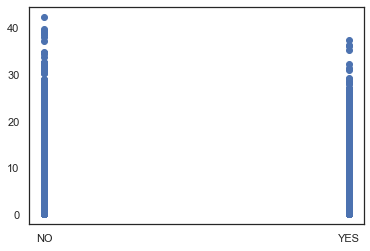

In [15]:
pyplot.scatter(data["churn"],data["Cust_age"])
pyplot.show()

In [16]:
pyplot.scatter(data["churn"],data["NO_SRs_in_3Yrs"])
pyplot.show()

KeyError: 'NO_SRs_in_3Yrs'

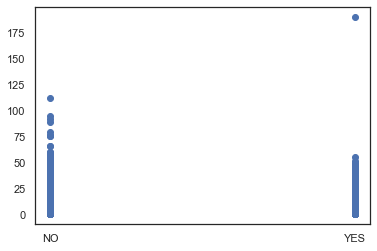

In [17]:
pyplot.scatter(data["churn"],data["rep_SRs_in_3Yrs"])
pyplot.show()

<H2>Relationship Between Categorical Variables

In [18]:
pd.crosstab(data.product_count ,data.churn)

churn,NO,YES
product_count,,
1,7233,6129
2,18237,8485
3,4033,598
4,416,0


In [19]:
pd.crosstab(data.data_ser ,data.churn)

AttributeError: 'DataFrame' object has no attribute 'data_ser'

In [20]:
pd.crosstab(data.NO_SRs_in_3Yrs ,data.churn)

AttributeError: 'DataFrame' object has no attribute 'NO_SRs_in_3Yrs'